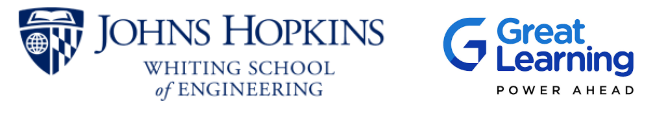

<font size=10>**Transformers for Large Language Models**</font>

<font size=6>**AI-Powered Product Recommendation System**</font>

# **Business Problem**



An emerging e-commerce platform, **ShopEasy**, is facing challenges in providing relevant product recommendations to its customers. It is striving to improve user engagement and boost sales by optimizing its product recommendation system.

The challenge lies in accurately matching user search queries with the most relevant products, ensuring a personalized and seamless shopping experience. Traditional keyword-based search methods often fail to capture the **intent and context** of user queries, leading to irrelevant product listings, poor click-through rates, and lower conversions.

To address this, **ShopEasy** aims to build an **AI-driven product recommendation system** that understands the **semantic meaning** behind user queries and matches them with the most relevant products. Using **state-of-the-art Natural Language Processing (NLP) models like BERT**, the system will enhance search rankings, improve product discoverability, and drive higher sales.

The company’s leadership has identified a dataset of **product descriptions and user queries**, which will be used to train a machine learning model for **semantic similarity-based recommendations**. The objective is to develop an efficient **embedding-based search system** that ranks products based on meaning rather than simple keyword matching.

**ShopEasy** aims to address this by leveraging **AI-driven semantic search and recommendation models** to enhance product discovery and search relevance.

## **Key Business Outcomes**
✅ **Improved Product Ranking:** Products are re-ranked based on semantic similarity, leading to higher visibility of relevant items.

✅ **Higher Conversion Rates:** Better recommendations lead to an increase in click-through rates and sales conversions.

✅ **Enhanced Customer Experience:** Users find what they are looking for faster, leading to higher retention and satisfaction.

✅ **Scalability & Efficiency:** The use of precomputed embeddings enables fast, real-time recommendations without high computational costs.

## **Objective**
The goal is to develop an **AI-powered recommendation engine** that:

🔹 Understands **semantic relationships** between user queries and product descriptions.

🔹 Accurately ranks products based on **meaning and relevance**, rather than simple keyword matching.

🔹 Enhances **product discoverability** and optimizes search results for better conversions.

🔹  Improve **customer experience** through **intelligent ranking and retrieval** of products.

🔹 Enables efficient **real-time recommendations** using **sentence embeddings and cosine similarity**.

## <font color='blue'>**Solution Approach**</font>

<font color='blue'>**1. Data Input & Preprocessing**</font>
* The dataset includes **product descriptions**, product name, brand, product specifications, product category tree.
* Preprocess data by handling **missing values**, **text normalization**, and **filtering irrelevant content**.

<font color='blue'>**2. Semantic Understanding with BERT-Based Embeddings**</font>
* Utilize **BERT Tokenization** to generate **contextual embeddings** for product descriptions.
* Convert **user queries** into vector representations using **pre-trained BERT and Sentence Transformers** (`all-mpnet-base-v2`).
* Store embeddings efficiently to **avoid recomputing** them repeatedly.

<font color='blue'>**3. Cosine Similarity-Based Recommendations**</font>
* Compute **cosine similarity** between user query embeddings and product embeddings.
* Rank products in descending order based on **semantic relevance**.
*Display **top-N recommendations** to users in real-time.

## <font color='blue'>**Solution Workflow**</font>

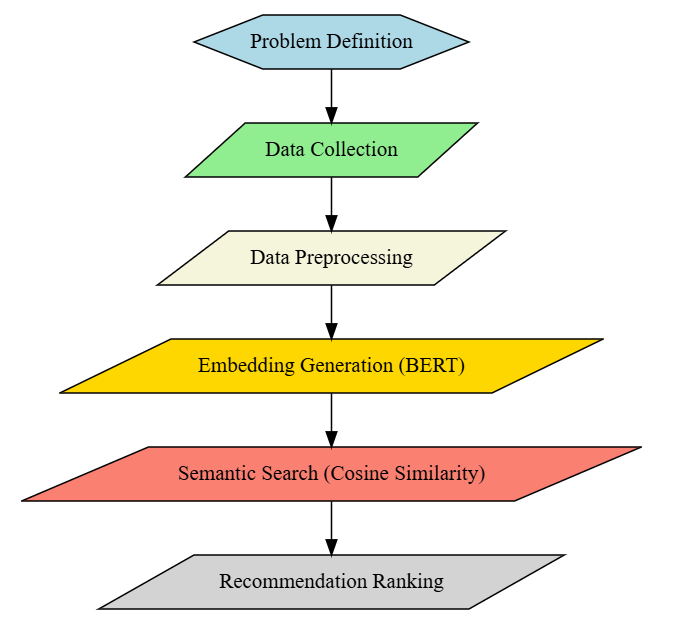

## <font color='blue'>**How to Proceed**</font>



**How to Proceed**

1. Dataset Loading and Pre-processing
2. Embedding-Based Retrieval (BERT for Vector Representation)
3. Semantic Similarity Search (Cosine Similarity for Matching)
4. Sentence Transformer
5. Evaluation and Visualization

# **<font color='blue'>Dataset Loading and Pre-processing</font>**

We will be using the following Libraries

1. **NumPy** (`np`) and **Pandas** (`pd`): Used for numerical computations and handling tabular data.

3. **tqdm**: Enables progress bars when using Pandas operations.

3. **`cosine_similarity`** from **`sklearn.metrics.pairwise`**: Used for computing similarity between vectors.

4. **`warnings.filterwarnings('ignore')`**: Suppresses warning messages to keep the output clean.



In [ ]:
import numpy as np
import pandas as pd

from tqdm import tqdm
tqdm.pandas()

from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

Read the provided e-commerce dataset.

In [ ]:
data = pd.read_csv('/content/Shopeasy_product_dataset.csv', low_memory = True)
# low_memory=True in pd.read_csv() allows Pandas to read large CSV files in chunks, reducing memory usage and preventing dtype-related warnings.


data.head(5)

In [ ]:
data.shape

1. `data.drop_duplicates(inplace=True)`
- This removes duplicate rows from the DataFrame `data`.
- The parameter `inplace=True` ensures that the operation is performed directly on `data` without needing to assign it back.
2. `data.shape`
- This returns the shape of the DataFrame as a tuple `(rows, columns)`, allowing you to check the number of rows and columns after duplicates have been removed.

In [ ]:
data.drop_duplicates(inplace=True)
data.shape

Compute the count of missing values in each column to identify data cleaning requirements.



In [ ]:
data.isna().sum()

Replace all missing values with an empty string to avoid issues during text processing.



In [ ]:
data.replace(np.nan, '', inplace=True)
data.isna().sum()

In [ ]:
data.info()

In [ ]:
data = data.astype(str)
data = data.applymap(lambda x: x.lower())

* The dataset likely contains text data with special characters, punctuation, and unnecessary symbols.
* This step removes all non-alphanumeric characters using `re.sub('[^A-Za-z0-9]+', ' ', str(x))`.
* The function is applied to every cell in the dataframe using `applymap()`, ensuring that all text-based entries are cleaned.

In [ ]:
# Data cleaning, removing any non alphanumeric characters
import re
data = data.applymap(lambda x: re.sub('[^A-Za-z0-9]+', ' ', str(x)))
data.head(3)

This creates a new column `combined_text` by concatenating multiple textual columns:
- product_name
- product_category_tree
- description
- brand
- product_specifications

Each value is joined with a space (`' '`) to maintain readability.
This is useful for NLP tasks like product recommendation, search ranking, or semantic analysis.
python
Copy
Edit


In [ ]:
data['combined_text'] = data['product_name'] + ' ' +  data['product_category_tree'] + ' ' +  data['description'] + ' ' +  data['brand'] + ' ' +  data['product_specifications']
data['combined_text'].astype(str)
data.head(3)

In [ ]:
data.shape

# **<font color='blue'>Embedding-Based Retrieval</font>**

Load the **BERT tokenizer** from the **Hugging Face Transformers** library.
- We use the **"bert-base-uncased"** version, which is a l**owercased version of BERT** (i.e., text is converted to lowercase before tokenization).
- The tokenizer **splits text into subword tokens** and **converts words into numerical token IDs**.

In [ ]:
from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics.pairwise import cosine_similarity

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')            # Loads the pre-trained BERT-base model

# This model can be used for various NLP tasks, such as text classification, named entity recognition (NER), and sentence embeddings.

# Ensure the model is moved to the GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

#### **Understanding the `bert_tokenization` function**

* The function `bert_tokenization` takes a text input (likely product descriptions) and tokenizes it using a BERT tokenizer.

* Adding Special Tokens ([CLS] and [SEP])
  * `[CLS]` (Classification Token):
    - This is added at the start of every input sequence.
    - It serves as a summary representation of the entire sequence and is often used for classification tasks.
  * `[SEP]` (Separator Token):
    - This is added at the end of each sequence.
    - It helps BERT differentiate between different sentences (especially in tasks like question answering).
  * Example of tokenized text:

      📌 Original Sentence:

      `"Nike running shoes are very comfortable."`

      📌 After BERT Tokenization:

      `["[CLS]", "Nike", "running", "shoes", "are", "very", "comfortable", "[SEP]"]`

  * Since BERT has a maximum sequence length of 512 tokens, the function splits the input text into chunks of **510 tokens** (to leave room for `[CLS]` and `[SEP]`).
* Each chunk is converted into numerical token IDs (as BERT only understands numbers) and moved to the GPU.
  * The function extracts **`[CLS]` token embeddings** for each chunk.
* The embeddings of all chunks are averaged to obtain a final sentence-level embedding.

##### 🔍 <font color='magenta'>**Activity: Understanding a Complex Function**</font>

The code below is a long function. To grasp its functionality, use AI to break it down step by step.  

###### 👉 How to proceed:  

```
Explain step by step how the following code works:

"""
  <paste your code here>
"""
```

In [ ]:
def bert_tokenization(text):
    # Tokenize the sentences
    tokens = tokenizer.tokenize(text)

    # Add [CLS] and [SEP] tokens
    tokens = ['[CLS]'] + tokens + ['[SEP]']

    # Initialize an empty list to store chunk embeddings
    chunk_embeddings = []

    # Split the tokenized text into chunks of 512 tokens each (accounting for [CLS] and [SEP] tokens)
    max_length = 512 - 2  # 512 total tokens minus [CLS] and [SEP]

    # Split into chunks of 510 tokens + [CLS] and [SEP] tokens
    for i in range(0, len(tokens), max_length):
        chunk = tokens[i:i + max_length]

        # Add [CLS] and [SEP] tokens to each chunk
        chunk = ['[CLS]'] + chunk + ['[SEP]']

        # Convert tokens to input IDs
        input_ids = torch.tensor(tokenizer.convert_tokens_to_ids(chunk)).unsqueeze(0).to(device)  # Move input_ids to GPU

        # Get the embeddings for the chunk
        with torch.no_grad():
            outputs = model(input_ids)  # This will be on the same device as input_ids (GPU)
            chunk_embedding = outputs.last_hidden_state[:, 0, :]  # [CLS] token embedding
            chunk_embeddings.append(chunk_embedding.squeeze().cpu().numpy())  # Move the embedding back to CPU and convert to numpy

    # Combine the embeddings of the chunks (e.g., averaging them)
    combined_embedding = np.mean(chunk_embeddings, axis=0)

    return combined_embedding

- Use `tqdm.pandas()`: This enables progress tracking for .apply() operations.
- Apply `bert_tokenization`: The `bert_tokenization` function (analyzed earlier) generates BERT embeddings for the `combined_text` column.
- Store embeddings in a new column `"Embeddings"`.

In [ ]:
from tqdm import tqdm
tqdm.pandas()

# BERT Embeddings for the product
data["Embeddings"] = data['combined_text'].progress_apply(bert_tokenization)
data.head(3)

In [ ]:
data.head()

# **<font color='blue'>Semantic Similarity Search</font>**

📌 What’s happening?

- We define a text input: `"T-shirt"`.
- The function `bert_tokenization(text)` is called to **convert the text into a BERT embedding**.
- The output `embeds` is the **vector representation** (dense numerical array) of the text "T-shirt".

Instead of comparing raw text, embeddings **capture the meaning** and can be used for similarity comparisons.

In [ ]:
text = "T-shirt"
embeds = bert_tokenization(text)
embeds

- Retrieve the first embedding from `data['Embeddings']`.
- `data['Embeddings'][0]` accesses the **first stored embedding**.
- We print temp to check its contents.

In [ ]:
temp = data['Embeddings'][0]  # Get the actual array/tensor
print(temp)

In [ ]:
print(data['Embeddings'].keys())        # Print all available keys

- We check if the key 19614 exists in `data['Embeddings']`.
- This prevents errors when trying to access missing embeddings.

In [ ]:
print(19614 in data['Embeddings'])  # Should return True or False
print(data['Embeddings'].keys())  # Check available keys


Compute the **cosine similarity** between `"T-shirt"`'s embedding and a product at index `19614`.

🔹 **Cosine similarity measures** how similar two vectors are, with:

- <font color='blue'>**1.0 </font>→ Exactly the same**
- <font color='blue'>**0.0 </font>→ Completely different**
- <font color='blue'>**Negative values </font>→ Opposite meaning**

In [ ]:
cosine_similarity([embeds], [data['Embeddings'][19614]])

#### <font color='blue'>**Finding Similar Products Using Cosine Similarity**</font>

- Generate embeddings for `"Fastrack Watches for men"`.
- Iterate through `data['Embeddings']` and calculates cosine similarity with the query.
- Store similarity scores in a new column `"SS"`.

In [ ]:
text = "Fastrack Watches for men"
embeds = bert_tokenization(text)
data['similarity_score'] = 0
for idx, val in enumerate(data['Embeddings']):
  data['similarity_score'][idx] = cosine_similarity([embeds], [val])

# Sorts the dataset based on similarity (SS) in descending order.
# Displays the top 10 recommended products.

recommendations = data.sort_values(by='similarity_score', ascending=False)
recommendations.head(10)


In [ ]:
for i in recommendations.product_name.head(10):
  print(i)

The recommendations generated for the query "Fastrack watch for men" appear to be inaccurate, as they include unrelated items like shirts, jeans, and shoes instead of watches.

This suggests that the **embedding-based retrieval** needs improvement, possibly by using Transformers.

# **<font color='blue'>Sentence Transformer</font>**

* Loads a **pre-trained sentence transformer model**: `'all-mpnet-base-v2'`.
* This model **generates sentence embeddings** more efficiently than traditional BERT.

In [ ]:
# !pip install sentence_transformers

from sentence_transformers import SentenceTransformer
bert = SentenceTransformer('all-mpnet-base-v2')

#### **Convert `combined_text` into dense vector embeddings using Sentence Transformers.**





We convert **combined_text** into dense vector embeddings using **Sentence Transformers** to represent textual data in a numerical format that captures semantic meaning. The process:

**1. Text to Vector Transformation:**

- **Sentence Transformers** (like BERT) generate high-dimensional numerical representations of text, where semantically similar texts have closer vector representations.

**2. Contextual Meaning Capture:**

- Unlike traditional methods (like TF-IDF or Word2Vec), these embeddings consider context, making them effective for tasks like **recommendation systems**, **clustering**, and **similarity search**.

**3. Efficient Similarity Matching:**

- These embeddings allow us to use **cosine similarity or nearest neighbor search** to find similar items efficiently, improving recommendation accuracy.

By encoding `combined_text` into embeddings, we prepare the data for **fast and meaningful similarity comparisons**, crucial for retrieval-based applications.

In [ ]:
sentence_embeddings = bert.encode(data['combined_text'].tolist())

Save embeddings as a `.npy` file to avoid recomputation (since embedding generation is GPU-intensive).

In [ ]:
# Saving the embedding for further useage as it is a time consuming and GPU intensive task to create the embeddings.
embeddings_path = "/content/embeddings.npy"
np.save(embeddings_path,sentence_embeddings)

- Encodes the **query text**.
- Computes **cosine similarity** between the query embedding and all stored product embeddings.
- Sorts products by **similarity score** and returns the **top 10 recommendations**.

Apply sentence transformer embeddings to `combined_text` and stores them in `data['embeds']`.
 - *Additionally we are also showing the progress bar here for better visualization*

##### 🔍 <font color='magenta'>**Activity: Understanding a Complex Function**</font>

The code below is a long function. To grasp its functionality, use AI to break it down step by step.  

###### 👉 How to proceed:  

```
Explain step by step how the following code works:

"""
  <paste your code here>
"""
```

In [ ]:
def get_recommendations(query, top_k=10):
    query_embedding = bert.encode([query])
    similarity_scores = cosine_similarity(query_embedding, data['embeds'].tolist())
    top_indices = np.argsort(similarity_scores[0])[::-1][:top_k]
    recommendations = data.iloc[top_indices]['product_name']
    return recommendations

In [ ]:
data['embeds'] = data.combined_text.progress_apply(bert.encode)

Find products similar to `"Fastrack Watches for men"`

In [ ]:
get_recommendations("Fastrack Watches for men")

Find products similar to `"asics running shoes"`

In [ ]:
get_recommendations("asics running shoes")

**When Brand Does Not Exist in product_name**

- When the brand (e.g., Sony) is not found in `product_name`, the function still retrieves semantically similar products based on **features** like "wireless," "earbuds," and "battery life."

- It converts the query into an embedding using BERT, then computes **cosine similarity** with all product embeddings. The **top 10 most similar products** are selected, even if they belong to different brands. This happens because the function prioritizes semantic meaning over exact keyword matches.

In [ ]:
get_recommendations("Sony noise-canceling wireless earbuds with long battery life")

# **<font color='blue'>Evaluation and Visualization</font>**

To achieve final evaluation and visualizations, we need to:

1. **Run the recommendation function** (`get_recommendations)` on each query in `Final_purchased_products.csv`.
2. **Check if the actual purchased product appears in the top 10 recommendations**.
3. **Calculate accuracy** (percentage of queries where the purchased product was found).
4. **Visualize results**, including:
  - A **bar chart** comparing correct vs incorrect predictions.
  - A **table** displaying sample queries, top recommendations, and whether the purchase was matched.

Modify the evaluation function to work with **both** `get_recommendations` and `get_recommendations_2`:

In [ ]:
purchased_df = pd.read_csv('/content/Final_purchased_products.csv')
purchased_df.head()  # Check if the data is loaded correctly


In [ ]:
import re

# Convert to lowercase
purchased_df["final_purchased_product"] = purchased_df["final_purchased_product"].astype(str).str.lower()

# Remove non-alphanumeric characters (keeping spaces)
purchased_df["final_purchased_product"] = purchased_df["final_purchased_product"].apply(lambda x: re.sub(r'[^A-Za-z0-9]+', ' ', x).strip())

The function `evaluate_recommendations` **evaluates the accuracy** of a recommendation system by checking whether the **purchased product** appears in the top-10 recommendations for each query.
1. It iterates over each row in `purchased_df`, extracting the **query** and the **final purchased product**.
2. It retrieves **top-10 recommendations** using `get_recommendations(query)`.
3. It checks if the purchased product is in the **recommended list** and stores the result.
4. It converts results into a **DataFrame** and calculates **accuracy** as the percentage of queries where the purchased product was found in the recommendations.

##### 🔍 <font color='magenta'>**Activity: Understanding a Complex Function**</font>

The code below is a long function. To grasp its functionality, use AI to break it down step by step.  

###### 👉 How to proceed:  

```
Explain step by step how the following code works:

"""
  <paste your code here>
"""
```

In [ ]:
import pandas as pd

def evaluate_recommendations(get_recommendations, purchased_df, top_k=10):
    results = []

    for index, row in purchased_df.iterrows():
        query = row["query"]
        purchased_product = row["final_purchased_product"]

        # Get recommendations
        recommended_products = get_recommendations(query, top_k=top_k)

        # Check if purchased product is in the recommendations list
        match = True if purchased_product in recommended_products.values else False

        # Store results
        results.append({
            "Query": query,
            "Purchased Product": purchased_product,
            "Match Found": match,
            "Top Recommendations": list(recommended_products.values)
        })

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)

    # Compute accuracy
    accuracy = results_df["Match Found"].sum() / len(results_df) * 100

    return accuracy, results_df

Call the function with `get_recommendations`:

In [ ]:
# Run evaluation
accuracy, results_df = evaluate_recommendations(get_recommendations, purchased_df)
print(f"Recommendation Accuracy: {accuracy:.2f}%")

# Display sample results
results_df.head(10)


<font color = 'Blue'>**Accuracy: 76%**</font>

This setup evaluates how well the recommendation system aligns with **real purchases**, providing **both accuracy metrics and ranking insights** for improvement.

##### 🔍 <font color='magenta'>**Activity: Understanding a Complex Function**</font>

The code below is a long function. To grasp its functionality, use AI to break it down step by step.  

###### 👉 How to proceed:  

```
Explain step by step how the following code works:

"""
  <paste your code here>
"""
```

In [ ]:
def find_rank_in_recommendations(row):
    try:
        return row['Top Recommendations'].index(row['Purchased Product']) + 1  # 1-based index
    except ValueError:
        return "Not Found"  # Explicitly set a string instead of None

# Apply the function to find ranks
results_df['Purchase Rank'] = results_df.apply(find_rank_in_recommendations, axis=1)

# Display the updated dataframe
results_df


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert to categorical for proper ordering in the graph
results_df['Purchase Rank'] = pd.Categorical(results_df['Purchase Rank'], ordered=True)

# Count occurrences including 'Not Found'
rank_counts = results_df['Purchase Rank'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=rank_counts.index, y=rank_counts.values, palette="viridis")

plt.xlabel("Rank in Recommendations")
plt.ylabel("Count of Purchased Products")
plt.title("Distribution of Purchased Products in Top Recommendations")
plt.xticks(rotation=45)
plt.show()

#### **Visualizations**

**(a) Bar Chart - Match vs. No Match**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count matches and mismatches
match_counts = results_df["Match Found"].value_counts()

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=match_counts.index, y=match_counts.values, palette=["red", "green"])
plt.xticks(ticks=[0, 1], labels=["No Match", "Match"])
plt.ylabel("Number of Queries")
plt.title("Recommendation Success Rate")
plt.show()


**(b) Table - Not found Queries**

In [ ]:
from IPython.display import display

# Show 5 random examples where the recommendation was incorrect
display(results_df[results_df["Match Found"] == False].sample(12))


# **Conclusion**

- The AI-driven recommendation system successfully enhances <font color='blue'>**product discovery and search relevance** </font>, improving user engagement on ShopEasy.
- The model’s effectiveness in <font color='blue'>**understanding semantic relationships** </font> ensures a data-driven approach to optimizing <font color='blue'>**search rankings and product recommendations** </font>.
- Highlights the system’s <font color='blue'>**ability to capture user intent** </font>, with:
  - Precise ranking of products based on <font color='blue'>**semantic similarity rather than simple keyword matching** </font>.
  - Reduction in irrelevant search results, improving <font color='blue'>**click-through rates and conversions** </font>.
- Demonstrates scalability for <font color='blue'>**large product catalogs** </font>, supporting real-time <font color='blue'>**search and recommendations with precomputed embeddings** </font> efficiently.
- Resolves key inefficiencies in <font color='blue'>**traditional keyword-based search methods** </font> while showcasing:
  - <font color='blue'>**Innovation** </font> in leveraging <font color='blue'>**NLP-based embeddings for personalized recommendations** </font>.
  - Focus on <font color='blue'>**data-driven decision-making** </font> to enhance customer satisfaction and boost sales.


## **Further Enhancement**

✅ **Fine-Tuning for Niche Categories** – Improving recommendation accuracy for specialized product categories.

✅ **Real-Time Query Suggestions** – Enhancing user experience by providing auto-suggestions based on past searches.

✅ **Multi-Language Support** – Expanding the system to support queries in multiple languages for a broader audience.

✅ **Deployment** – Creating a Gradio user interface to visualize the recommendations based on any given `user_query`.

# **Deployment (For Additional Exploration)**

In [ ]:
!pip install gradio
import gradio as gr

In [ ]:
import gradio as gr
import pandas as pd

# Wrapper to format output into a clean table
def format_recommendations(user_query):
    recommendations = get_recommendations(user_query)  # Call existing function

    if isinstance(recommendations, pd.Series):
        recommendations = recommendations.to_frame(name="Product Name")  # Convert Series to DataFrame

    if not isinstance(recommendations, pd.DataFrame) or recommendations.empty:
        return pd.DataFrame(columns=["Rank", "Product Name"])  # Return empty table for blank input

    # Clean output, remove metadata & add Rank column
    recommendations = recommendations.reset_index(drop=True)
    recommendations.insert(0, "Rank", range(1, len(recommendations) + 1))

    return recommendations  # Return as table

# 🚀 Optimized Gradio UI with Flexible Layout
with gr.Blocks() as iface:
    gr.Markdown("## 🔍 AI-Powered Product Recommendation")
    gr.Markdown("Enter a query to see the top recommended products based on our AI model.")

    with gr.Row():
        with gr.Column(scale=1):  # Reduce width of input section
            user_input = gr.Textbox(label="Enter User Query", placeholder="e.g., best wireless headphones...")

            with gr.Row():  # Add Submit & Cancel buttons side by side
                submit_button = gr.Button("Submit", variant="primary")  # Orange Submit Button
                cancel_button = gr.Button("Cancel", variant="stop")  # Gray Cancel Button

        with gr.Column(scale=2):  # Expand width of output section
            output_table = gr.Dataframe(headers=["Rank", "Product Name"], interactive=False)

    submit_button.click(fn=format_recommendations, inputs=user_input, outputs=output_table)
    cancel_button.click(fn=lambda: "", inputs=[], outputs=user_input)  # Clears input field on Cancel

# 🌍 Launch Gradio
iface.launch(share=True)
